# データ解析のための統計モデリング入門
## 3章 一般化線形モデル(GLM) --ポアソン回帰--
### 3.2 観測されたデータの概要を調べる

In [3]:
d <- read.csv('../prepared/chapter3/data3a.csv')
d

y,x,f
<int>,<dbl>,<fct>
6,8.31,C
6,9.44,C
6,9.50,C
12,9.07,C
10,10.16,C
4,8.32,C
9,10.61,C
9,10.06,C
9,9.93,C


In [4]:
d$x

[1]  8.31  9.44  9.50  9.07 10.16  8.32 10.61 10.06  9.93 10.43 10.36 10.15
 [13] 10.92  8.85  9.42 11.11  8.02 11.93  8.55  7.19  9.83 10.79  8.89 10.09
 [25] 11.63 10.21  9.45 10.44  9.44 10.48  9.43 10.32 10.33  8.50  9.41  8.96
 [37]  9.67 10.26 10.36 11.80 10.94 10.25  8.74 10.46  9.37  9.74  8.95  8.74
 [49] 11.32  9.25 10.14  9.05  9.89  8.76 12.04  9.91  9.84 11.87 10.16  9.34
 [61] 10.17 10.99  9.19 10.67 10.96 10.55  9.69 10.91  9.60 12.37 10.54 11.30
 [73] 12.40 10.18  9.53 10.24 11.76  9.52 10.40  9.96 10.30 11.54  9.42 11.28
 [85]  9.73 10.78 10.21 10.51 10.73  8.85 11.20  9.86 11.54 10.03 11.88  9.15
 [97]  8.52 10.24 10.86  9.97

In [5]:
d$y

[1]  6  6  6 12 10  4  9  9  9 11  6 10  6 10 11  8  3  8  5  5  4 11  5 10  6
 [26]  6  7  9  3 10  2  9 10  5 11 10  4  8  9 12  8  9  8  6  6 10 10  9 12  6
 [51] 14  6  7  9  6  7  9 13  9 13  7  8 10  7 12  6 15  3  4  6 10  8  8  7  5
 [76]  6  8  9  9  6  7 10  6 11 11 11  5  6  4  5  6  5  8  5  9  8  6  8  7  9

In [6]:
d$f

[1] C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C
 [38] C C C C C C C C C C C C C T T T T T T T T T T T T T T T T T T T T T T T T
 [75] T T T T T T T T T T T T T T T T T T T T T T T T T T
Levels: C T

In [7]:
class(d)

[1] "data.frame"

In [8]:
class(d$y)

[1] "integer"

In [9]:
class(d$x)

[1] "numeric"

In [10]:
class(d$f)

[1] "factor"

In [22]:
summary(d)

       y               x          f     
 Min.   : 2.00   Min.   : 7.190   C:50  
 1st Qu.: 6.00   1st Qu.: 9.428   T:50  
 Median : 8.00   Median :10.155         
 Mean   : 7.83   Mean   :10.089         
 3rd Qu.:10.00   3rd Qu.:10.685         
 Max.   :15.00   Max.   :12.400         

### 3.3 統計モデリングの前にデータを図示する

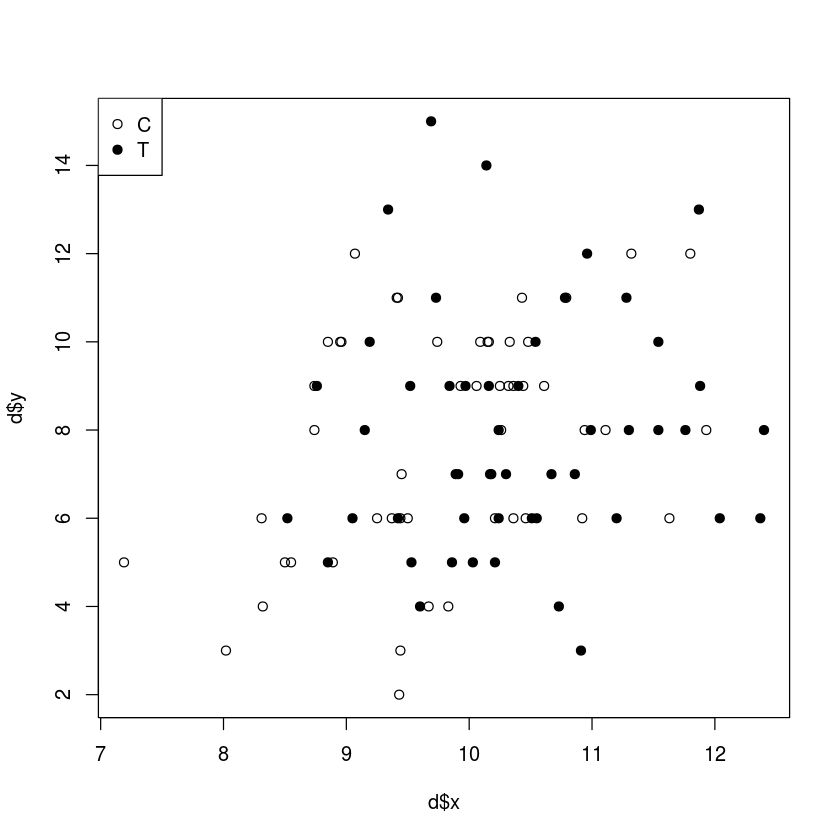

In [15]:
plot(d$x, d$y, pch = c(21, 19)[d$f])
legend("topleft", legend = c("C", "T"), pch = c(21, 19))

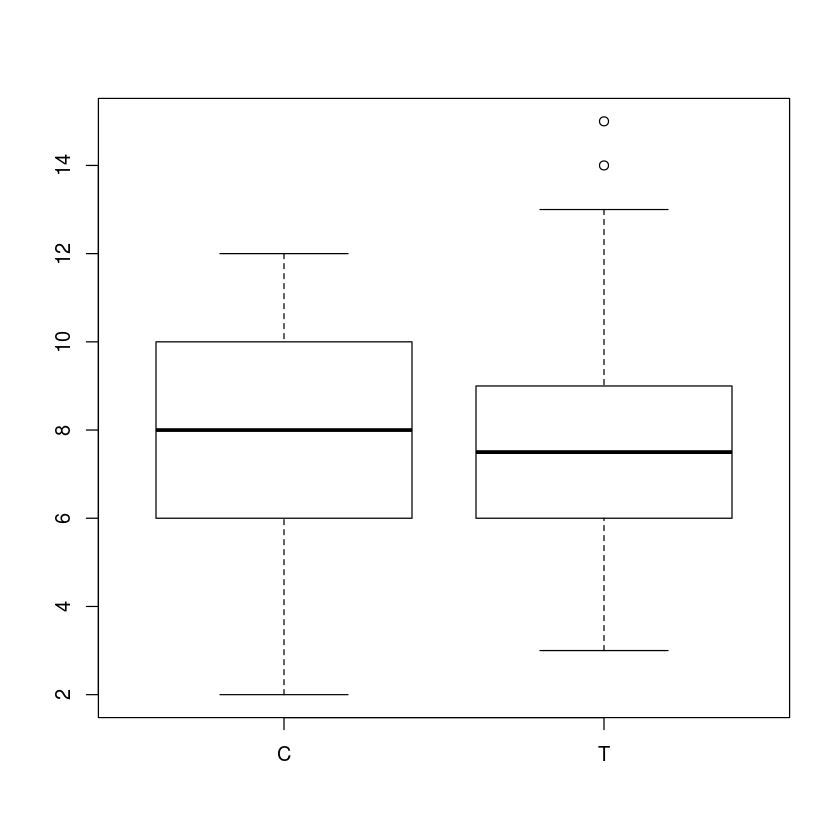

In [16]:
plot(d$f, d$y)

### 3.4 ポアソン回帰の統計モデル

In [20]:
fit <- glm(y ~ x, data = d, family = poisson)
fit


Call:  glm(formula = y ~ x, family = poisson, data = d)

Coefficients:
(Intercept)            x  
    1.29172      0.07566  

Degrees of Freedom: 99 Total (i.e. Null);  98 Residual
Null Deviance:	    89.51 
Residual Deviance: 84.99 	AIC: 474.8

In [21]:
summary(fit)


Call:
glm(formula = y ~ x, family = poisson, data = d)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3679  -0.7348  -0.1775   0.6987   2.3760  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.29172    0.36369   3.552 0.000383 ***
x            0.07566    0.03560   2.125 0.033580 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 89.507  on 99  degrees of freedom
Residual deviance: 84.993  on 98  degrees of freedom
AIC: 474.77

Number of Fisher Scoring iterations: 4


In [23]:
logLik(fit)

'log Lik.' -235.3863 (df=2)

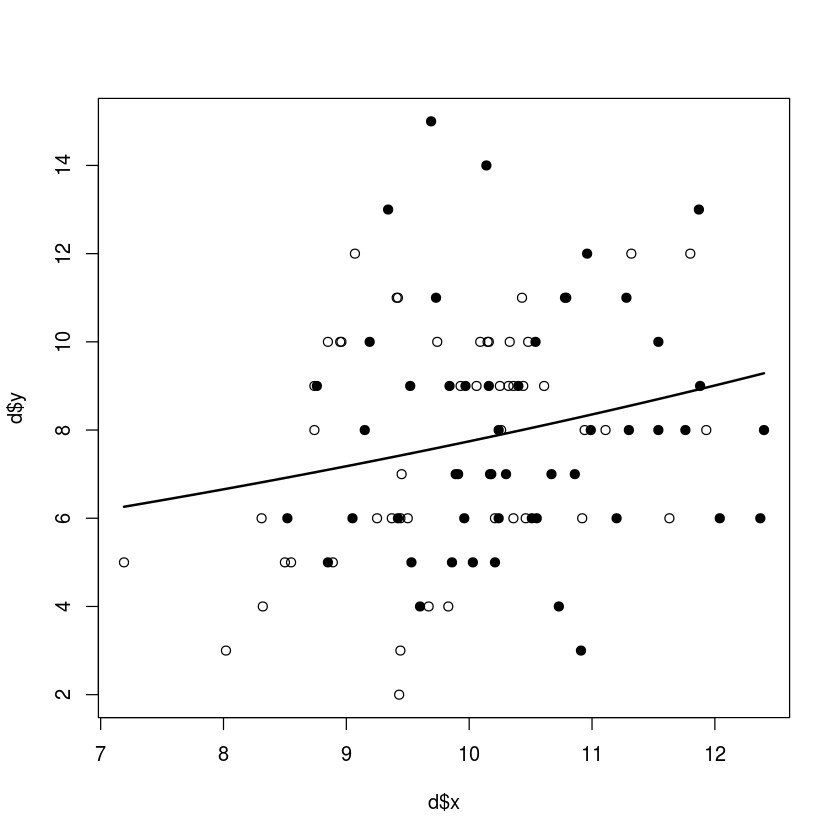

In [26]:
plot(d$x, d$y, pch = c(21, 19)[d$f])
xx <- seq(min(d$x), max(d$x), length = 100)
lines(xx, exp(1.29 + 0.0757 * xx), lwd = 2)

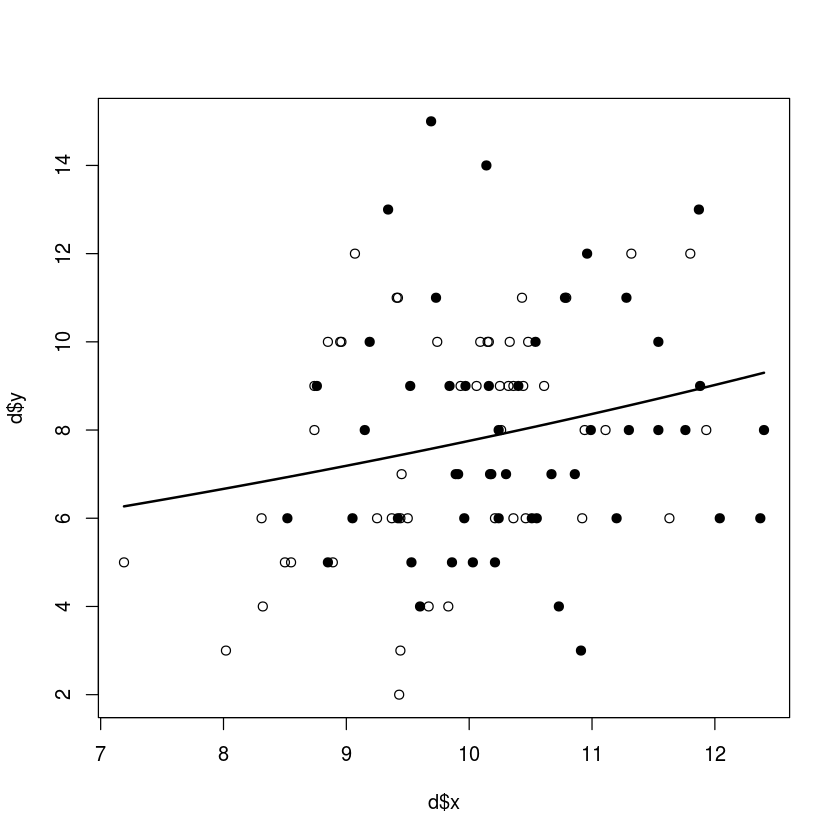

In [28]:
plot(d$x, d$y, pch = c(21, 19)[d$f])
yy <- predict(fit, newdata = data.frame(x = xx), type = "response")
lines(xx, yy, lwd = 2)

### 3.5 説明変数が因子型の統計モデル

In [29]:
fit.f <- glm(y ~ f, data = d, family = poisson)
fit.f


Call:  glm(formula = y ~ f, family = poisson, data = d)

Coefficients:
(Intercept)           fT  
    2.05156      0.01277  

Degrees of Freedom: 99 Total (i.e. Null);  98 Residual
Null Deviance:	    89.51 
Residual Deviance: 89.48 	AIC: 479.3

In [30]:
summary(fit.f)


Call:
glm(formula = y ~ f, family = poisson, data = d)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.47515  -0.69941   0.04264   0.72467   2.25204  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.05156    0.05070  40.463   <2e-16 ***
fT           0.01277    0.07148   0.179    0.858    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 89.507  on 99  degrees of freedom
Residual deviance: 89.475  on 98  degrees of freedom
AIC: 479.25

Number of Fisher Scoring iterations: 4


In [31]:
logLik(fit.f)

'log Lik.' -237.6273 (df=2)

### 3.6 説明変数が数量型＋因子型の統計モデル

In [32]:
fit.all <- glm(y ~ x + f, data = d, family = poisson)
fit.all


Call:  glm(formula = y ~ x + f, family = poisson, data = d)

Coefficients:
(Intercept)            x           fT  
    1.26311      0.08007     -0.03200  

Degrees of Freedom: 99 Total (i.e. Null);  97 Residual
Null Deviance:	    89.51 
Residual Deviance: 84.81 	AIC: 476.6

In [33]:
summary(fit.all)


Call:
glm(formula = y ~ x + f, family = poisson, data = d)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3977  -0.7337  -0.2023   0.6795   2.4317  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.26311    0.36963   3.417 0.000633 ***
x            0.08007    0.03704   2.162 0.030620 *  
fT          -0.03200    0.07438  -0.430 0.667035    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 89.507  on 99  degrees of freedom
Residual deviance: 84.808  on 97  degrees of freedom
AIC: 476.59

Number of Fisher Scoring iterations: 4


### 3.6.1 対数リンク関数のわかりやすさ：掛け算される効果
- メモ  
説明変数が応答変数に与える影響が積（割合）になる方が良いのか、和（絶対値）になる方が良いのかを常に考える。前者の場合は対数リンク関数を使う。